In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import anndata as ad
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import rcParams
from gprofiler import gprofiler
import os
from scipy import stats
import custom_functions as cf

In [89]:
## set parameters for visualisation

sc.settings.set_figure_params(dpi=80)

# settings for the plots
sc.set_figure_params(scanpy=True, dpi=80, dpi_save=250,
                     frameon=True, vector_friendly=True,
                     #color_map="YlGnBu",
                     format='pdf', transparent=False,
                     ipython_format='png2x')

## First donor: 

In [4]:
adata1 = ad.read("/home/hpc/martinez/00_projects/human/precision_toxicology/rep1/processed_scRNAseq_10X_precision_toxicology_filt_norm_clust_Aug2020.h5ad")

In [5]:
annot = []
for idx, elem in enumerate(adata1.obs["Age"]):
    annot.append("rep1"+"_"+elem)
adata1.obs["donor"] = annot

In [6]:
adata1.uns["donor_colors"] = ['#7c91b4', '#f81ef5']

In [7]:
adata1y = adata1[adata1.obs["Age"] == "young"]

In [8]:
sc.pp.pca(adata1y, n_comps=20)
sc.pp.neighbors(adata1y, n_neighbors=50, n_pcs=10)
sc.tl.umap(adata1y, alpha=1, gamma=1, a=2, b=2)

In [9]:
sc.tl.louvain(adata1y, resolution=0.75)

In [10]:
adata1y.uns["louvain_colors"] = ["#ff7f0e","#55aad8","#d60179","#9b1c03","#17b2b1","#0bee79","#220668"]

In [11]:
adata1y.uns["Treatment_colors"] = ['#888de4', '#deb82c', '#279e68', '#d62728']

In [12]:
adata1y.uns["cyclone_phases_colors"] = ['#505050', '#bc086b', '#9ad3e3']

... storing 'donor' as categorical


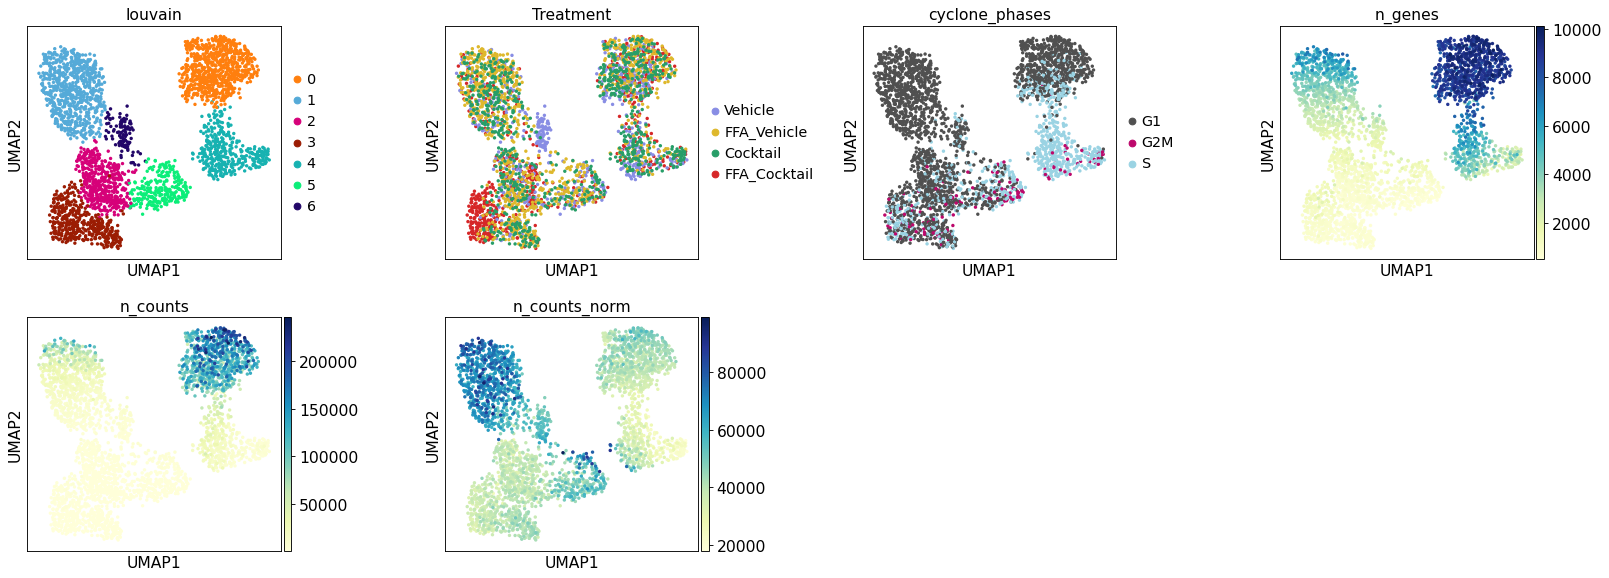

In [13]:
sc.pl.umap(adata1y, color=["louvain","Treatment","cyclone_phases","n_genes", "n_counts","n_counts_norm"], 
           wspace=0.5, cmap="YlGnBu",
          save="_metadata_young_rep1_louvain075.pdf")

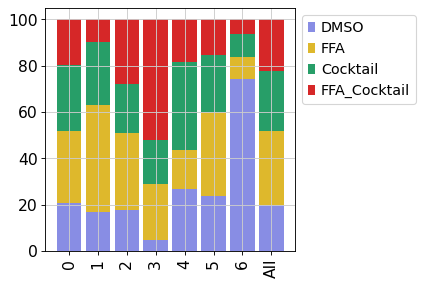

In [14]:
# Data
df = pd.crosstab(adata1y.obs["louvain"], adata1y.obs["Treatment"], margins = True)
r = np.arange(8)
 
# From raw value to percentage
totals = [i+j+k+l for i,j,k,l in zip(df['Vehicle'], df['FFA_Vehicle'], df['Cocktail'], df["FFA_Cocktail"])]

DMSO = [i / j * 100 for i,j in zip(df['Vehicle'], totals)]
FFA = [i / j * 100 for i,j in zip(df['FFA_Vehicle'], totals)]
Cocktail = [i / j * 100 for i,j in zip(df['Cocktail'], totals)]
FFA_Cocktail = [i / j * 100 for i,j in zip(df['FFA_Cocktail'], totals)]

# plot
barWidth = 0.85
names = ('0', '1', '2', '3',
         '4', '5', '6', 'All')

# Create bars
plt.bar(r, DMSO, width=barWidth, label="DMSO", color="#888de4")
plt.bar(r, FFA, bottom=DMSO, width=barWidth, label="FFA", color="#deb82c")
plt.bar(r, Cocktail, bottom=[i+j for i,j in zip(DMSO, FFA)], width=barWidth, label="Cocktail", color="#279e68")
plt.bar(r, FFA_Cocktail, bottom=[i+j+k for i,j,k in zip(DMSO, FFA, Cocktail)], width=barWidth, label="FFA_Cocktail", color="#d62728")


    
# Custom x axis
plt.xticks(r, names)
#plt.xlabel("group")
plt.xticks(rotation=90)
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

# Show graphic
plt.show()

In [15]:
sc.tl.rank_genes_groups(adata1y, groupby="louvain", n_genes=1000)

In [16]:
genes = {}
for elem in set(adata1y.obs["louvain"]):
    genes["rep1_young_"+elem] = []
for elem in set(adata1y.obs["louvain"]):
    genes["rep1_young_"+elem].append(adata1y.uns["rank_genes_groups"]["names"][elem].tolist())
for elem in set(adata1y.obs["louvain"]):
    genes["rep1_young_"+elem] = [item for sublist in genes["rep1_young_"+elem] for item in sublist]

In [17]:
df = pd.DataFrame(genes)

In [19]:
df.to_csv("rep1_young_top1000.csv")

## Second donor:

In [20]:
adata1o = adata1[adata1.obs["Age"] == "old"]

In [21]:
sc.pp.pca(adata1o, n_comps=20)
sc.pp.neighbors(adata1o, n_neighbors=50, n_pcs=10)
sc.tl.umap(adata1o, alpha=1, gamma=1, a=1.5, b=1.5)

In [22]:
sc.tl.louvain(adata1o, resolution=0.25)

In [23]:
adata1o.uns["louvain_colors"] = ["#ff7f0e","#17b2b1","#9b1c03","#1f77b4"]

In [24]:
adata1o.uns["Treatment_colors"] = ['#888de4', '#deb82c', '#279e68', '#d62728']

In [25]:
adata1o.uns["cyclone_phases_colors"] = ['#505050', '#bc086b', '#9ad3e3']

... storing 'donor' as categorical


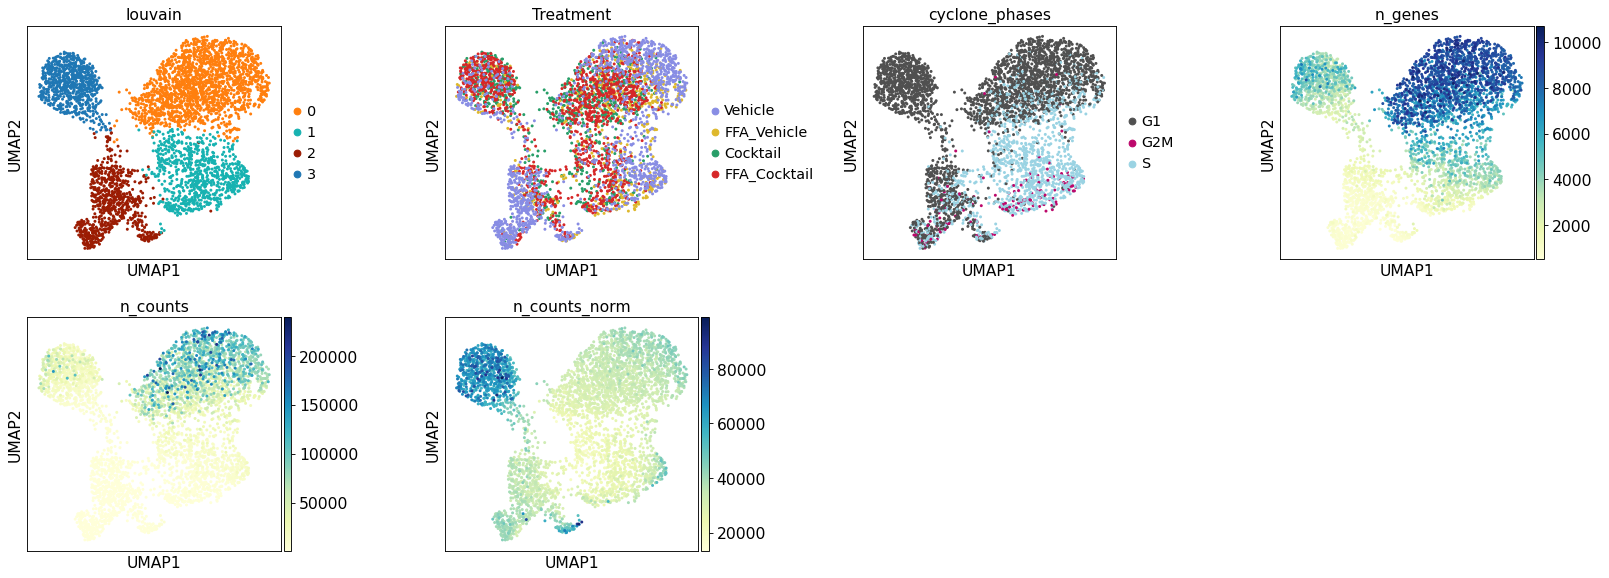

In [26]:
sc.pl.umap(adata1o, color=["louvain","Treatment","cyclone_phases","n_genes", "n_counts","n_counts_norm"], 
           wspace=0.5, cmap="YlGnBu",
          save="_metadata_old_rep1_louvain025.pdf")

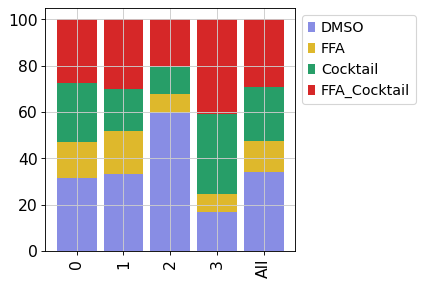

In [27]:
# Data
df = pd.crosstab(adata1o.obs["louvain"], adata1o.obs["Treatment"], margins = True)
r = np.arange(5)
 
# From raw value to percentage
totals = [i+j+k+l for i,j,k,l in zip(df['Vehicle'], df['FFA_Vehicle'], df['Cocktail'], df["FFA_Cocktail"])]

DMSO = [i / j * 100 for i,j in zip(df['Vehicle'], totals)]
FFA = [i / j * 100 for i,j in zip(df['FFA_Vehicle'], totals)]
Cocktail = [i / j * 100 for i,j in zip(df['Cocktail'], totals)]
FFA_Cocktail = [i / j * 100 for i,j in zip(df['FFA_Cocktail'], totals)]

# plot
barWidth = 0.85
names = ('0', '1', '2', '3', 'All')

# Create bars
plt.bar(r, DMSO, width=barWidth, label="DMSO", color="#888de4")
plt.bar(r, FFA, bottom=DMSO, width=barWidth, label="FFA", color="#deb82c")
plt.bar(r, Cocktail, bottom=[i+j for i,j in zip(DMSO, FFA)], width=barWidth, label="Cocktail", color="#279e68")
plt.bar(r, FFA_Cocktail, bottom=[i+j+k for i,j,k in zip(DMSO, FFA, Cocktail)], width=barWidth, label="FFA_Cocktail", color="#d62728")


    
# Custom x axis
plt.xticks(r, names)
#plt.xlabel("group")
plt.xticks(rotation=90)
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

# Show graphic
plt.show()

In [28]:
sc.tl.rank_genes_groups(adata1o, groupby="louvain", n_genes=1000)

In [29]:
genes = {}
for elem in set(adata1o.obs["louvain"]):
    genes["rep1_old_"+elem] = []
for elem in set(adata1o.obs["louvain"]):
    genes["rep1_old_"+elem].append(adata1o.uns["rank_genes_groups"]["names"][elem].tolist())
for elem in set(adata1o.obs["louvain"]):
    genes["rep1_old_"+elem] = [item for sublist in genes["rep1_old_"+elem] for item in sublist]

In [30]:
df = pd.DataFrame(genes)

In [31]:
df.to_csv("rep1_old_top1000.csv")

## Third donor:

In [32]:
adata2 = ad.read("/home/hpc/martinez/00_projects/human/precision_toxicology/rep2/filtered_normalized_scRNAseq_10X_precision_toxicology_rep2_cyclone_Apr21.h5ad")

In [76]:
adata2 = adata2.copy()
adata2.var_names = adata2.var["gene_name"].tolist()
adata2.raw = adata2

In [77]:
annot = []
for idx, elem in enumerate(adata2.obs["Age"]):
    annot.append("rep2"+"_"+elem)
adata2.obs["donor"] = annot

In [78]:
adata2.uns["Treatment_colors"] = ['#279e68', '#d62728','#deb82c','#888de4']
adata2.uns["donor_colors"] = ['#0f5e72', '#64215a']

In [79]:
# remove clusters with cells in samples experiencing wetting failure
# this will be described more in part 2 of the analysis with all cells together

In [80]:
adata2 = adata2[adata2.obs["louvain"] != "1",:]
adata2 = adata2[adata2.obs["louvain"] != "7",:]
adata2 = adata2[adata2.obs["louvain"] != "9",:]
adata2 = adata2[adata2.obs["louvain"] != "11",:]

In [81]:
annot = []
for idx, elem in enumerate(adata2.obs["Treatment"]):
    annot.append(adata2.obs["Age"][idx]+"_"+elem)
adata2.obs["condition"] = annot

Trying to set attribute `.obs` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [82]:
# here we actually remove all cells from 1 of the 2 failed conditions 
# to make sure they don't artificially drive the clustering 
adata2 = adata2[adata2.obs["condition"] != "young_Cocktail",:]

In [83]:
adata2y = adata2[adata2.obs["Age"] == "young"]

In [84]:
sc.pp.pca(adata2y, n_comps=20)
sc.pp.neighbors(adata2y, n_neighbors=50, n_pcs=10)
sc.tl.umap(adata2y)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [85]:
sc.tl.louvain(adata2y, resolution=0.3)

In [86]:
adata2y.uns["louvain_colors"] = ["#ff7f0e", "#a47665", "#55aad8", "#220668", "#17b2b1"]

In [87]:
adata2y.uns["cyclone_phases_colors"] = ['#505050', '#bc086b', '#9ad3e3']

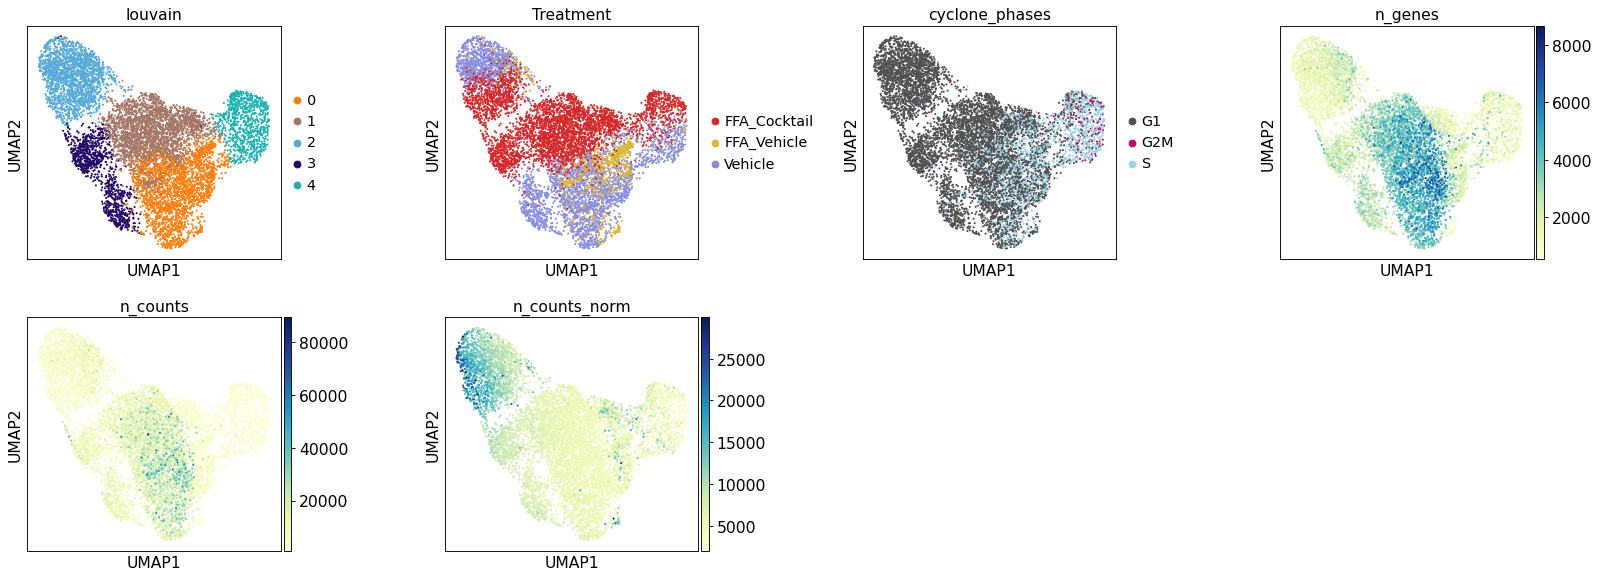

In [90]:
sc.pl.umap(adata2y, color=["louvain","Treatment","cyclone_phases","n_genes", "n_counts","n_counts_norm"], 
           wspace=0.5, cmap="YlGnBu",
          save="_metadata_young_rep2_louvain03.pdf")

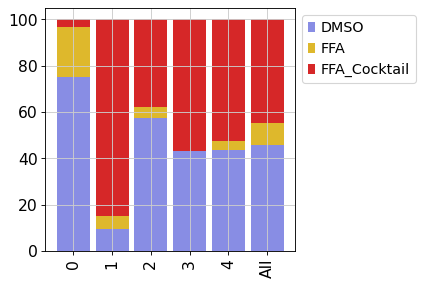

In [91]:
# Data
df = pd.crosstab(adata2y.obs["louvain"], adata2y.obs["Treatment"], margins = True)
r = np.arange(6)
 
# From raw value to percentage
totals = [i+j+k for i,j,k in zip(df['Vehicle'], df['FFA_Vehicle'], df["FFA_Cocktail"])]

DMSO = [i / j * 100 for i,j in zip(df['Vehicle'], totals)]
FFA = [i / j * 100 for i,j in zip(df['FFA_Vehicle'], totals)]
FFA_Cocktail = [i / j * 100 for i,j in zip(df['FFA_Cocktail'], totals)]

# plot
barWidth = 0.85
names = ('0', '1', '2', '3', '4', 'All')

# Create bars
plt.bar(r, DMSO, width=barWidth, label="DMSO", color="#888de4")
plt.bar(r, FFA, bottom=DMSO, width=barWidth, label="FFA", color="#deb82c")
plt.bar(r, FFA_Cocktail, bottom=[i+j for i,j in zip(DMSO, FFA)], width=barWidth, label="FFA_Cocktail", color="#d62728")


    
# Custom x axis
plt.xticks(r, names)
#plt.xlabel("group")
plt.xticks(rotation=90)
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

# Show graphic
plt.show()

In [92]:
sc.tl.rank_genes_groups(adata2y, groupby="louvain", n_genes=1000)

In [93]:
genes = {}
for elem in set(adata2y.obs["louvain"]):
    genes["rep2_young_"+elem] = []
for elem in set(adata2y.obs["louvain"]):
    genes["rep2_young_"+elem].append(adata2y.uns["rank_genes_groups"]["names"][elem].tolist())
for elem in set(adata2y.obs["louvain"]):
    genes["rep2_young_"+elem] = [item for sublist in genes["rep2_young_"+elem] for item in sublist]

In [94]:
df = pd.DataFrame(genes)
df.to_csv("rep2_young_top1000.csv")

## Fourth donor:

In [96]:
adata2o = adata2[adata2.obs["Age"] == "old"]

In [97]:
sc.pp.pca(adata2o, n_comps=20)
sc.pp.neighbors(adata2o, n_neighbors=50, n_pcs=10)
sc.tl.umap(adata2o)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [98]:
sc.tl.louvain(adata2o, resolution=0.25)

In [99]:
adata2o.uns["louvain_colors"] = ["#55aad8", "#ff7f0e", "#220668", "#17b2b1"]

In [100]:
adata2o.uns["Treatment_colors"] = ['#279e68', '#d62728','#deb82c','#888de4']

In [101]:
adata2o.uns["cyclone_phases_colors"] = ['#505050', '#bc086b', '#9ad3e3']

... storing 'donor' as categorical
... storing 'condition' as categorical


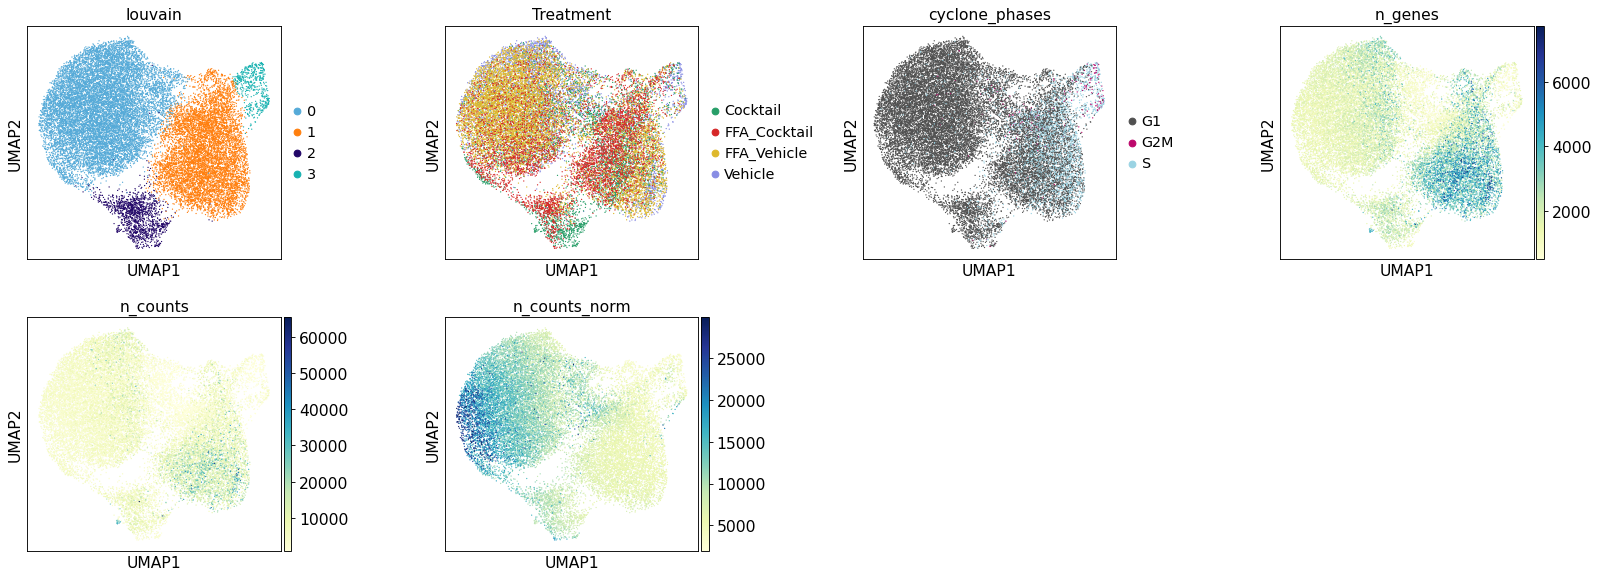

In [102]:
sc.pl.umap(adata2o, color=["louvain","Treatment","cyclone_phases","n_genes", "n_counts","n_counts_norm"], 
           wspace=0.5, cmap="YlGnBu",
           save="_metadata_young_rep2_louvain025.pdf")

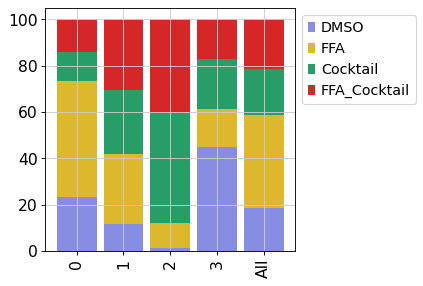

In [103]:
# Data
df = pd.crosstab(adata2o.obs["louvain"], adata2o.obs["Treatment"], margins = True)
r = np.arange(5)
 
# From raw value to percentage
totals = [i+j+k+l for i,j,k,l in zip(df['Vehicle'], df['FFA_Vehicle'], df['Cocktail'], df["FFA_Cocktail"])]

DMSO = [i / j * 100 for i,j in zip(df['Vehicle'], totals)]
FFA = [i / j * 100 for i,j in zip(df['FFA_Vehicle'], totals)]
Cocktail = [i / j * 100 for i,j in zip(df['Cocktail'], totals)]
FFA_Cocktail = [i / j * 100 for i,j in zip(df['FFA_Cocktail'], totals)]

# plot
barWidth = 0.85
names = ('0', '1', '2', '3', 'All')

# Create bars
plt.bar(r, DMSO, width=barWidth, label="DMSO", color="#888de4")
plt.bar(r, FFA, bottom=DMSO, width=barWidth, label="FFA", color="#deb82c")
plt.bar(r, Cocktail, bottom=[i+j for i,j in zip(DMSO, FFA)], width=barWidth, label="Cocktail", color="#279e68")
plt.bar(r, FFA_Cocktail, bottom=[i+j+k for i,j,k in zip(DMSO, FFA, Cocktail)], width=barWidth, label="FFA_Cocktail", color="#d62728")


    
# Custom x axis
plt.xticks(r, names)
#plt.xlabel("group")
plt.xticks(rotation=90)
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

# Show graphic
plt.show()

In [104]:
sc.tl.rank_genes_groups(adata2o, groupby="louvain", n_genes=1000)

In [105]:
genes = {}
for elem in set(adata2o.obs["louvain"]):
    genes["rep2_old_"+elem] = []
for elem in set(adata2o.obs["louvain"]):
    genes["rep2_old_"+elem].append(adata2o.uns["rank_genes_groups"]["names"][elem].tolist())
for elem in set(adata2o.obs["louvain"]):
    genes["rep2_old_"+elem] = [item for sublist in genes["rep2_old_"+elem] for item in sublist]

In [106]:
df = pd.DataFrame(genes)
df.to_csv("rep2_old_top1000.csv")

## Overlap of genes between clusters from different donors

In [107]:
rep1y = pd.read_csv("rep1_young_top1000.csv")
rep1o = pd.read_csv("rep1_old_top1000.csv")
rep2y = pd.read_csv("rep2_young_top1000.csv")
rep2o = pd.read_csv("rep2_old_top1000.csv")

In [108]:
df = pd.concat([rep1y.reset_index(drop=True), rep1o], axis=1)
df = pd.concat([df.reset_index(drop=True), rep2y], axis=1)
df = pd.concat([df.reset_index(drop=True), rep2o], axis=1)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [109]:
def intersection(lst1, lst2):
    return [item for item in lst1 if item in lst2]

def calc_overlap_coef(dict1, dict2):
    """\
    Calculate overlap coefficient between the values of two dictionaries
    Note: dict values must be sets
    """
    overlap_coef = np.zeros((len(dict1), len(dict2)))

    for j, marker_group in enumerate(dict1):
        tmp = [
            len(intersection(dict2[i], dict1[marker_group]))
            / max(min(len(dict2[i]), len(dict1[marker_group])), 1)
            for i in dict2.keys()
        ]
        overlap_coef[j, :] = tmp

    return overlap_coef

In [110]:
gene_dict = df.to_dict('list')

In [111]:
clean_dict = {k:[elem for elem in v if elem is not np.nan] for k,v in gene_dict.items()}

In [112]:
overlap = calc_overlap_coef(clean_dict, clean_dict)

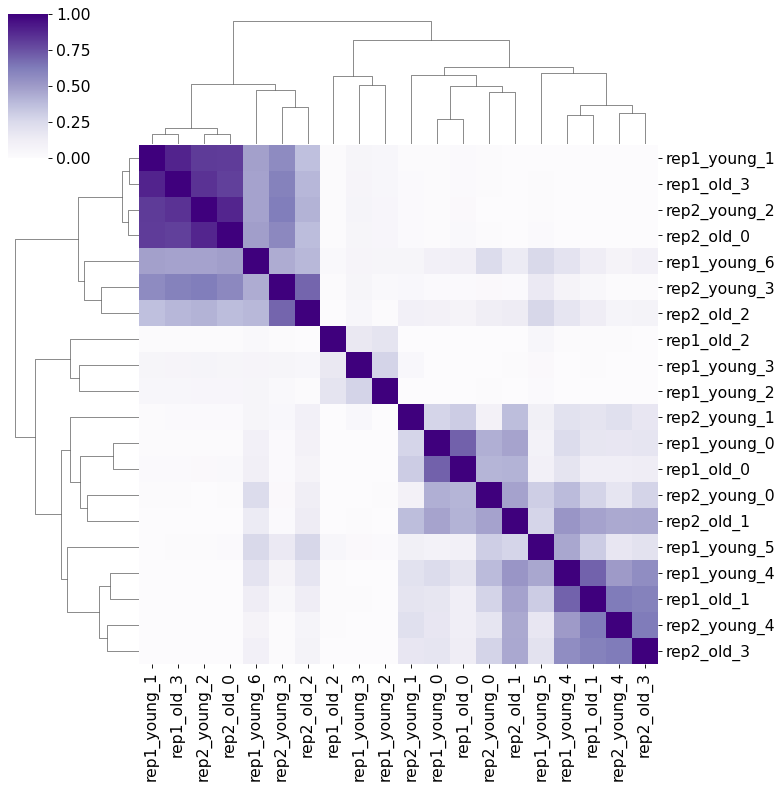

In [113]:
plt.rcParams['figure.figsize']=(7,7)
df2 = pd.DataFrame(overlap)
df2.index = df.columns.tolist()
df2.columns = df.columns.tolist()
mask = np.triu(np.ones_like(df2, dtype=np.bool))
sns.clustermap(df2, cmap="Purples", yticklabels=1, xticklabels=1)
plt.savefig("cluster_overlaps_top1000_genes.pdf", bbox_inches="tight")